### Estimate the mixed fugacity coefficients for a binary mixture of chloroform(1)/1,4-dioxane(2) at T = 323.15K and P = 24.95 kPa

This is a binary system in VLE, so we can use the Prausnitz mixing model, generalized correlation and the Abbott model to compute the Virial coeffcients $B_{11},B_{22}$ and the mixed coefficient $B_{12}$. The binary mixed fugacity coefficients are given by:

\begin{eqnarray}
\ln\hat{\phi}_{1}^{v} & = & \frac{P}{RT}\left(B_{11}+y_{2}^{2}\delta_{12}\right)\\
\ln\hat{\phi}_{2}^{v} & = & \frac{P}{RT}\left(B_{22}+y_{1}^{2}\delta_{12}\right)\\
\end{eqnarray}

where $\delta_{ij}$ = $2B_{ij} - B_{ii} - B_{jj}$

In [5]:
# include -
include("Soln.jl");

In [10]:
# Setup the problem -
T_K = 323.15 
P_bar = 0.2495 # bar (criticals are in bar)
y1 = 0.6184 # from L25 data set 
(f1_hat,f2_hat,data_table) = solve(y1,T_K,P_bar);

In [11]:
data_table

,Tc,Pc,Vc,Zc,wc,B
,Float64,Float64,Float64,Float64,Float64,Float64
1,536.4,54.72,0.239,0.293,0.222,-0.942407
2,587.2,52.27,0.239,0.256,0.272,-1.44887
3,561.226,53.591,0.239,0.2745,0.247,-1.16232


In [12]:
f1_hat

0.9906077429390138

$\hat{\phi}^{v}_{1}\simeq{1}$ so the vapor phase is ideal at P = 24.95 kPA

### How does the mixed fugacity coefficient change with pressure?

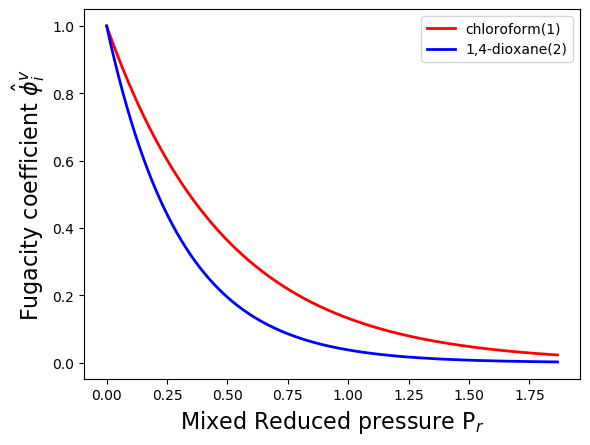

In [21]:
# setup the simulation -
T_K = 323.15 
y1 = 0.6184 # from L25 data set
P_bar_array = collect(range(0.0,stop=100.0,length=1000))
phi_array = zeros(1000,2)
for (index, pressure_value) in enumerate(P_bar_array)
    
    # compute the fugacity coefficients -
    (f1_hat,f2_hat,data_table) = solve(y1,T_K,pressure_value);
    
    # grab the solution -
    phi_array[index,1] = f1_hat
    phi_array[index,2] = f2_hat
end

# plot -
plot(P_bar_array*(1/data_table[!,:Pc][end]),phi_array[:,1],"r",lw=2,label="chloroform(1)");
plot(P_bar_array*(1/data_table[!,:Pc][end]),phi_array[:,2],"b",lw=2,label="1,4-dioxane(2)");
legend(loc="upper right")
xlabel(L"Mixed Reduced pressure P$_{r}$",fontsize=16);
ylabel(L"Fugacity coefficient $\hat{\phi}^{v}_{i}$",fontsize=16);

In [22]:
phi_array

1000×2 Array{Float64,2}:
 1.0        1.0
 0.996221   0.993899
 0.992457   0.987835
 0.988706   0.981808
 0.98497    0.975818
 0.981248   0.969864
 0.97754    0.963947
 0.973846   0.958066
 0.970166   0.95222
 0.9665     0.946411
 0.962848   0.940637
 0.959209   0.934898
 0.955584   0.929194
 ⋮          
 0.0237404  0.00236637
 0.0236507  0.00235193
 0.0235614  0.00233758
 0.0234723  0.00232332
 0.0233836  0.00230914
 0.0232953  0.00229505
 0.0232072  0.00228105
 0.0231195  0.00226713
 0.0230322  0.0022533
 0.0229451  0.00223956
 0.0228584  0.00222589
 0.022772   0.00221231